In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from my_lib.net import DeepConvNet

In [2]:
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=False)

In [3]:
def get_classified_ids(net, x_test, y_test):
    classified_ids = []
    acc = 0.0
    batch_size = 100

    for i in range(x_test.shape[0] // batch_size):
        x_batch = x_test[i * batch_size:(i + 1) * batch_size]
        y_batch = y_test[i * batch_size:(i + 1) * batch_size]
        pred = net.predict(x_batch, train_flg=False)
        pred = np.argmax(pred, axis=1)
        classified_ids.append(pred)
        acc += np.sum(pred == y_batch)

    classified_ids = np.array(classified_ids).flatten()
    acc = acc / x_test.shape[0]
    print(f'Test Accuracy : {acc}')
    return classified_ids

In [4]:
def show_misclassified(classified_ids, x_test, y_test):
    max_view = 20
    current_view = 1

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)

    mis_pairs = {}

    for i, v in enumerate(classified_ids == y_test):
        if not v:
            ax = fig.add_subplot(4, 5, current_view, xticks=[], yticks=[])
            ax.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
            mis_pairs[current_view] = (y_test[i], classified_ids[i])
            current_view += 1
            if current_view > max_view:
                break

    print(mis_pairs)
    plt.show()

Load network parameters
Test Accuracy : 0.9893
{1: (6, 0), 2: (2, 7), 3: (5, 3), 4: (6, 0), 5: (8, 6), 6: (7, 2), 7: (8, 2), 8: (2, 1), 9: (7, 2), 10: (4, 9), 11: (8, 9), 12: (1, 5), 13: (6, 0), 14: (6, 5), 15: (7, 1), 16: (7, 2), 17: (9, 4), 18: (4, 9), 19: (9, 3), 20: (7, 1)}


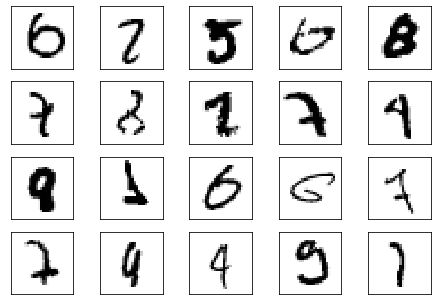

In [5]:
net = DeepConvNet()
net.load_params('deep_conv_params.pkl')
classified_ids = get_classified_ids(net, x_test, y_test)
show_misclassified(classified_ids, x_test, y_test)

Load network parameters
Test Accuracy : 0.9935
{1: (6, 0), 2: (3, 5), 3: (3, 5), 4: (8, 3), 5: (7, 3), 6: (1, 3), 7: (8, 9), 8: (6, 0), 9: (6, 5), 10: (7, 2), 11: (9, 4), 12: (7, 1), 13: (5, 3), 14: (1, 3), 15: (0, 6), 16: (9, 4), 17: (7, 9), 18: (6, 0), 19: (9, 8), 20: (4, 9)}


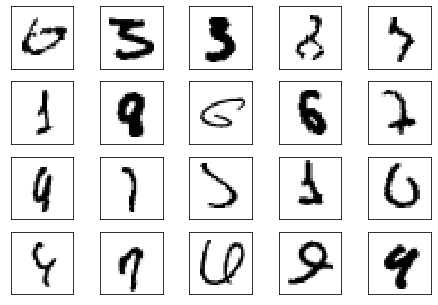

In [6]:
net = DeepConvNet()
net.load_params('deep_convnet_params.pkl')
classified_ids = get_classified_ids(net, x_test, y_test)
show_misclassified(classified_ids, x_test, y_test)